# Building MNIST model using Tensorflow

## Load all required packages

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## check tensorflow Version 

In [2]:
print(tf.__version__)

2.3.2


## Load MNIST dataset from keras dataset

In [4]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

## Check Image of first data

<AxesSubplot:>

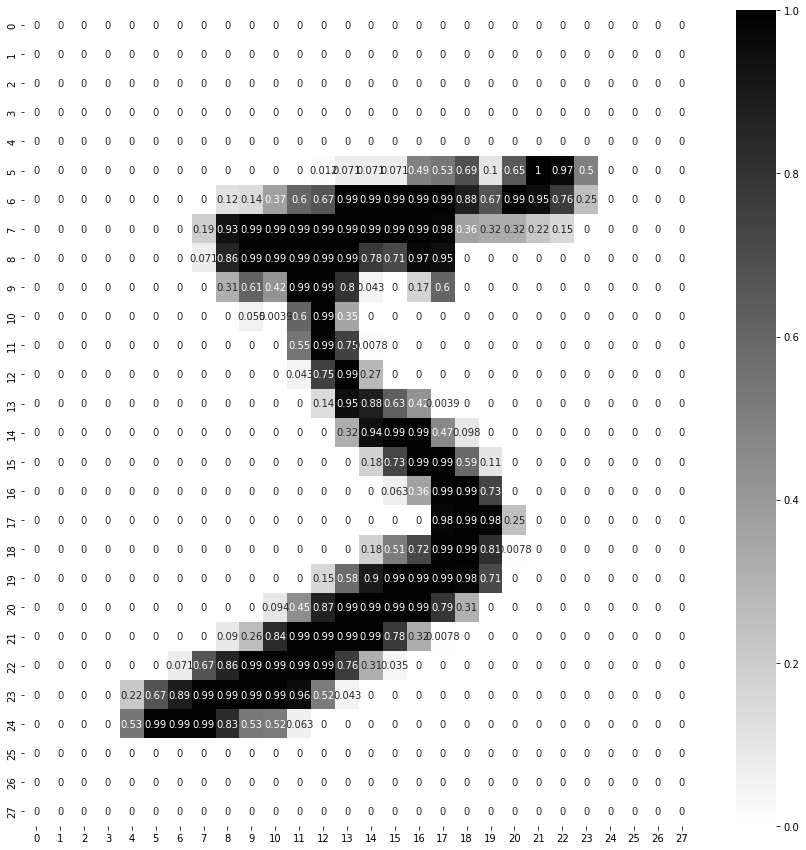

In [5]:
img = X_train_full[0]
plt.figure(figsize=(15, 15))
sns.heatmap(img/255, annot=True, cmap='binary')

# Log train summary data

In [15]:
import time
import os

def get_log_path(log_dir="logs"):
    unique_name = time.strftime("log_%Y_%m_%d_%H_%M_%S")
    log_path = os.path.join(log_dir, unique_name)
    print(f"saving logs at : {log_path}")
    return log_path

log_dir = get_log_path()

saving logs at : logs\log_2021_10_28_20_53_11


## Write images in Log

In [18]:
file_writer = tf.summary.create_file_writer(logdir=log_dir)
with file_writer.as_default():
    images = np.reshape(X_train[10: 30], (-1, 28, 28, 1))
    tf.summary.image("20 handwriten digital images", images, max_outputs=25, step=0)


## Load Tensorboard

In [38]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [39]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 21564), started 0:32:08 ago. (Use '!kill 21564' to kill it.)

## Tensor board Callbacks

In [23]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

## Early Stoping Callback

In [26]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

## Model Checkpoint

In [27]:
ckpath = "model_chkpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(ckpath, save_best_only=True)


## Split Train and Validation dataset

In [28]:
X_vaild, X_train = X_train_full[:5000] / 255., X_train_full[5000: ] / 255.
y_vaild, y_train = y_train_full[:5000], y_train_full[5000:]

## Check Test dataset size

In [29]:
X_test = X_test/255.

## Build Sequential layers for NN training

In [30]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28], name='Input_Layer'),
    tf.keras.layers.Dense(300, activation='relu', name='hiddenLayer1'),
    tf.keras.layers.Dense(100, activation='relu', name='hiddenLayer2'),
    tf.keras.layers.Dense(10, activation='softmax', name='outputLayer')
]

model_CLF = tf.keras.Sequential(LAYERS)

## Check Model Summary

In [31]:
model_CLF.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Check model weights

In [32]:
weights, bias = model_CLF.layers[1].get_weights()
print(weights, bias)

[[-0.06536578 -0.05875574 -0.01926726 ... -0.02117673  0.04659505
   0.03966971]
 [ 0.04860672  0.0253481  -0.01247457 ...  0.05534303  0.06911461
  -0.03655798]
 [ 0.00436191 -0.01892162  0.0426898  ...  0.07349552 -0.03324156
   0.01003264]
 ...
 [-0.0112706   0.02005688  0.00156916 ... -0.02464501 -0.03568902
  -0.01853856]
 [-0.00666834 -0.05225375 -0.05804571 ...  0.03591043  0.03972144
   0.03399563]
 [-0.07404738 -0.03394697  0.00092597 ... -0.06813852  0.00863347
   0.0115828 ]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

## Set Training parameters

In [33]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_CLF.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

## Set Model fit on train and epochs

In [41]:
CALLBACK_LIST = [tensorboard_cb, early_stopping_cb, checkpointing_cb]
EPOCHS = 5
VALIDATIONS = (X_vaild, y_vaild)
history = model_CLF.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATIONS, callbacks=CALLBACK_LIST)

Epoch 1/5
   1/1719 [..............................] - ETA: 1s - loss: 0.0035 - accuracy: 1.0000WARNING:tensorflow:From C:\Users\vk006\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0198 - accuracy: 0.9963 - val_loss: 0.0668 - val_accuracy: 0.9812
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0187 - accuracy: 0.9968 - val_loss: 0.0656 - val_accuracy: 0.9820
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0178 - accuracy: 0.9971 - val_loss: 0.0664 - val_accuracy: 0.9816
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0168 - accuracy: 0.9974 - val_loss: 0.0649 - val_accuracy: 0.9830
Epoch 5/5
1719/1719 [==========

In [42]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 21564), started 0:35:03 ago. (Use '!kill 21564' to kill it.)

## Plot Accuracy in chart

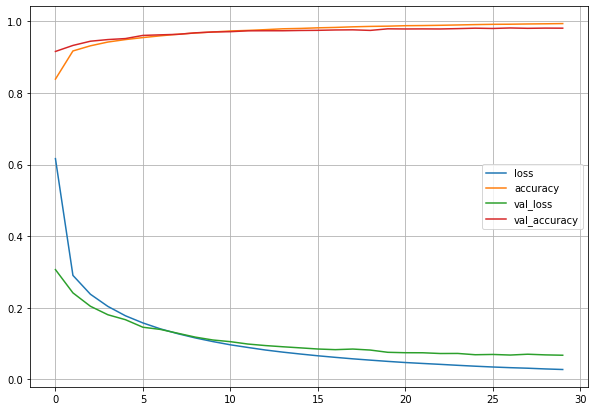

In [37]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid()
plt.show()

## Evaluate Model with Test dataset

In [36]:
model_CLF.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9781


[0.06932420283555984, 0.9781000018119812]

## Predict first 3 test dataset

In [46]:
X_new = X_test[:3]
y_prob = model_CLF.predict(X_new)
print(y_prob.round(3))

[[0.    0.    0.    0.    0.    0.    0.    0.999 0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.998 0.    0.    0.    0.    0.    0.    0.001 0.   ]]


## Convert Predicted values to max value of position

In [47]:
y_pred = np.argmax(y_prob, axis=1)
print(y_pred)

[7 2 1]


## Save the model

In [48]:
model_CLF.save("mnist.h5")

## Load tensoflow model

In [ ]:
model_preload = tf.keras.models.load_model("mnist.h5")

## Load trained model from check point and train model

In [45]:
chkpoint_model = tf.keras.models.load_model("model_chkpt.h5")
history_chkpt = chkpoint_model.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATIONS, callbacks=CALLBACK_LIST)

Epoch 1/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0199 - accuracy: 0.0991 - val_loss: 0.0681 - val_accuracy: 0.0962
Epoch 2/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0189 - accuracy: 0.0991 - val_loss: 0.0649 - val_accuracy: 0.0966
Epoch 3/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0180 - accuracy: 0.0991 - val_loss: 0.0644 - val_accuracy: 0.0970
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0170 - accuracy: 0.0990 - val_loss: 0.0644 - val_accuracy: 0.0968
Epoch 5/5
1094/1719 [==================>...........] - ETA: 1s - loss: 0.0156 - accuracy: 0.0997